In [1]:
#import of subprograms

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from __plt__2 import *

In [2]:
#inputting database
path = r'E:/databases/Merged.csv'
usecols = ['ager_percentile50', 'T_C_ISM_percentile50', 'T_C_ISM_percentile84', 'T_C_ISM_percentile16', 'T_W_BC_percentile50', 'T_W_BC_percentile84', 'T_W_BC_percentile16', 'P100_flux', 'P100_fluxerr', 'BPT', 'WHAN', 'Z_1', 'SFR_0_1Gyr_percentile50', 'SFR_0_1Gyr_percentile84', 'SFR_0_1Gyr_percentile16', 'mass_stellar_percentile50', 'SurfaceDensity', 'SurfaceDensityErr', 'SurfaceDensityFlag']
MainDataFrame = pd.read_csv(path, usecols=usecols)

In [3]:
#bids setting
bids_age = [[0.0, 8.8], [8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_age_plt = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_mass = [[0.0, 10.0], [10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_z = [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.3], [0.3, 0.34]]

In [4]:
# MainDataFrame.replace('""', -999.0, inplace=True)
# MainDataFrame['SurfaceDensity'] = pd.to_numeric(MainDataFrame['SurfaceDensity'])
# MainDataFrame['SurfaceDensityErr'] = pd.to_numeric(MainDataFrame['SurfaceDensityErr'])
# MainDataFrame['SurfaceDensityFlag'] = pd.to_numeric(MainDataFrame['SurfaceDensityFlag'])
# MainDataFrame.to_csv('main.csv')

# db = MainDataFrame

# db = db[db['SurfaceDensity'] > 0]
# db = db[db['SurfaceDensityErr'] > 0]
# db = db[db['SurfaceDensity'] > 2*db['SurfaceDensityErr']]
# db['SurfaceDensity'] = np.log10(db['SurfaceDensity'])
# UP = np.log10(db['SurfaceDensity'] + db['SurfaceDensityErr'])
# print(UP)
# db['SurfaceDensityUp'] = UP
# DOWN = np.log10(db['SurfaceDensity'] - db['SurfaceDensityErr'])
# db['SurfaceDensityDown'] = DOWN

# print(db['SurfaceDensity'])
# print(db['SurfaceDensityUp'])
# print(db['SurfaceDensityDown'])

       BPT  WHAN     Z_1  mass_stellar_percentile50  T_C_ISM_percentile16  \
0     AGNX   LLR  0.0550                     10.410                17.888   
1     AGNX   LLR  0.0552                     10.820                21.988   
2    UNCXY  sAGN  0.0933                     10.880                22.963   
3     UNCX   ELR  0.0883                     10.470                18.938   
4    AGNXY  wAGN  0.0854                     10.660                15.938   
..     ...   ...     ...                        ...                   ...   
640  SFGXY  sAGN  0.1836                     10.650                20.513   
641  UNCXY  sAGN  0.1520                     10.560                15.513   
642  UNCXY   SFG  0.1248                      9.357                15.338   
643   UNCX   NER  0.2800                     10.890                16.838   
644  UNCXY  sAGN  0.1379                     10.260                21.213   

     T_C_ISM_percentile50  T_C_ISM_percentile84  T_W_BC_percentile16  \
0  

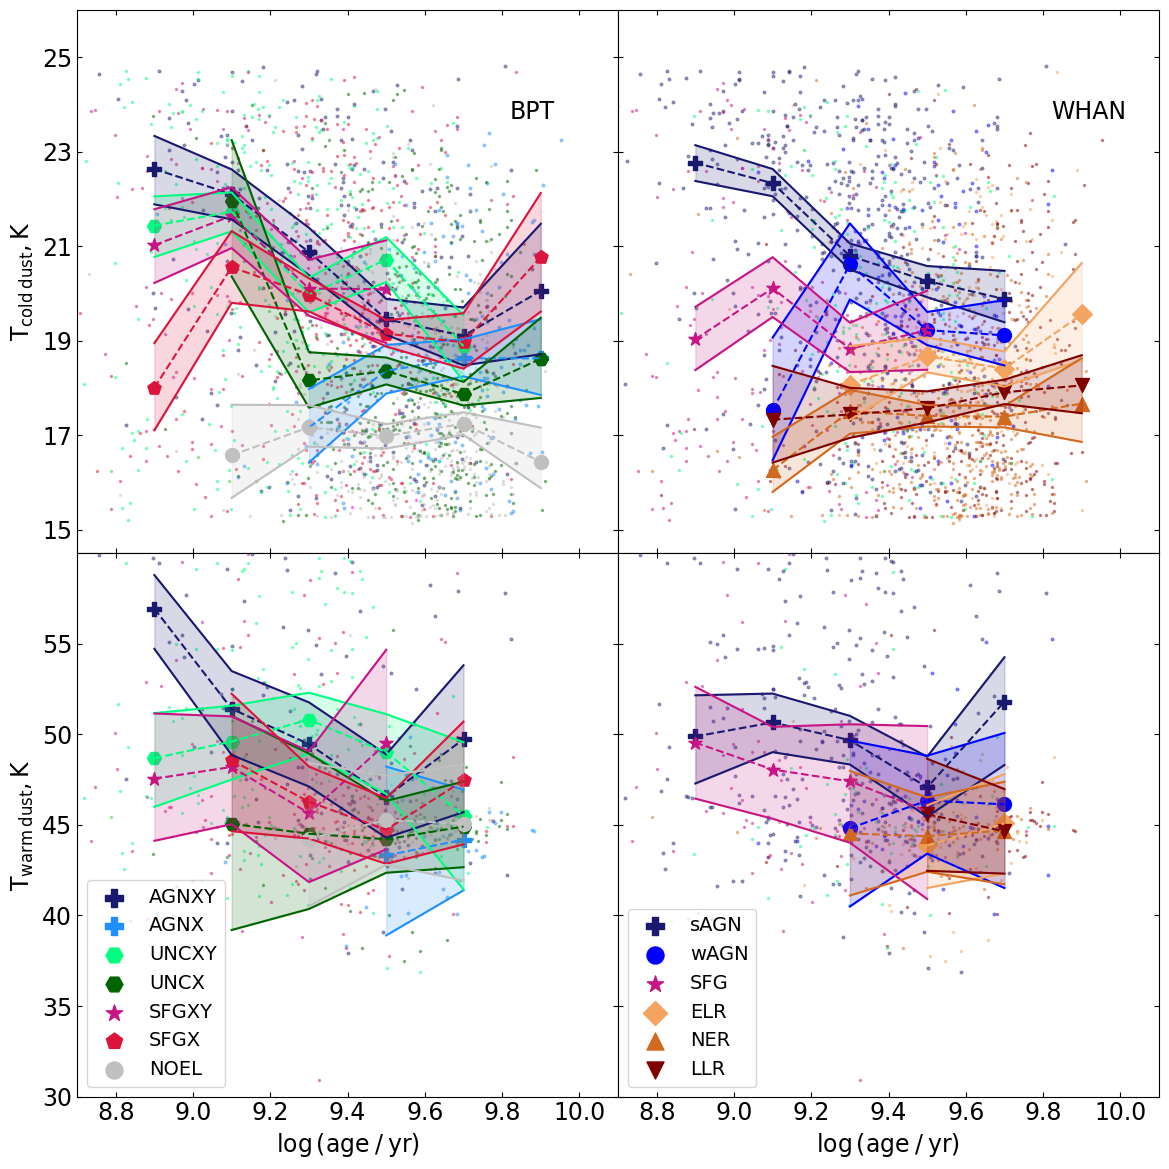

In [5]:
db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(2, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)

#creating basic plotting pars
pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : False,
    'ylabel' : r'$\mathrm{T_{cold \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['P100_flux'] > 2*db['P100_fluxerr']]
db2 = db2[db2['P100_flux'] > 0]
db2.reset_index(inplace=True, drop=True)
print(db2)
print(db2.shape)

pars_dict_2 = {
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'ager_percentile50',
    'y' : 'T_W_BC_percentile50',
    'up' : 'T_W_BC_percentile84',
    'down' : 'T_W_BC_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [30, 60],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(30, 60, 5),
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'ylabel' : r'$\mathrm{T_{warm \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)

#additional plotting stuff
fig.savefig('TDC.pdf')
#displaying and saving the figure 

In [4]:
db = MainDataFrame

print(db.shape)
db2 = db[db['ager_percentile50'] < 8.7]
print(db2.shape)


(1995, 19)
(30, 19)


(372, 19)
(893, 19)
(730, 19)


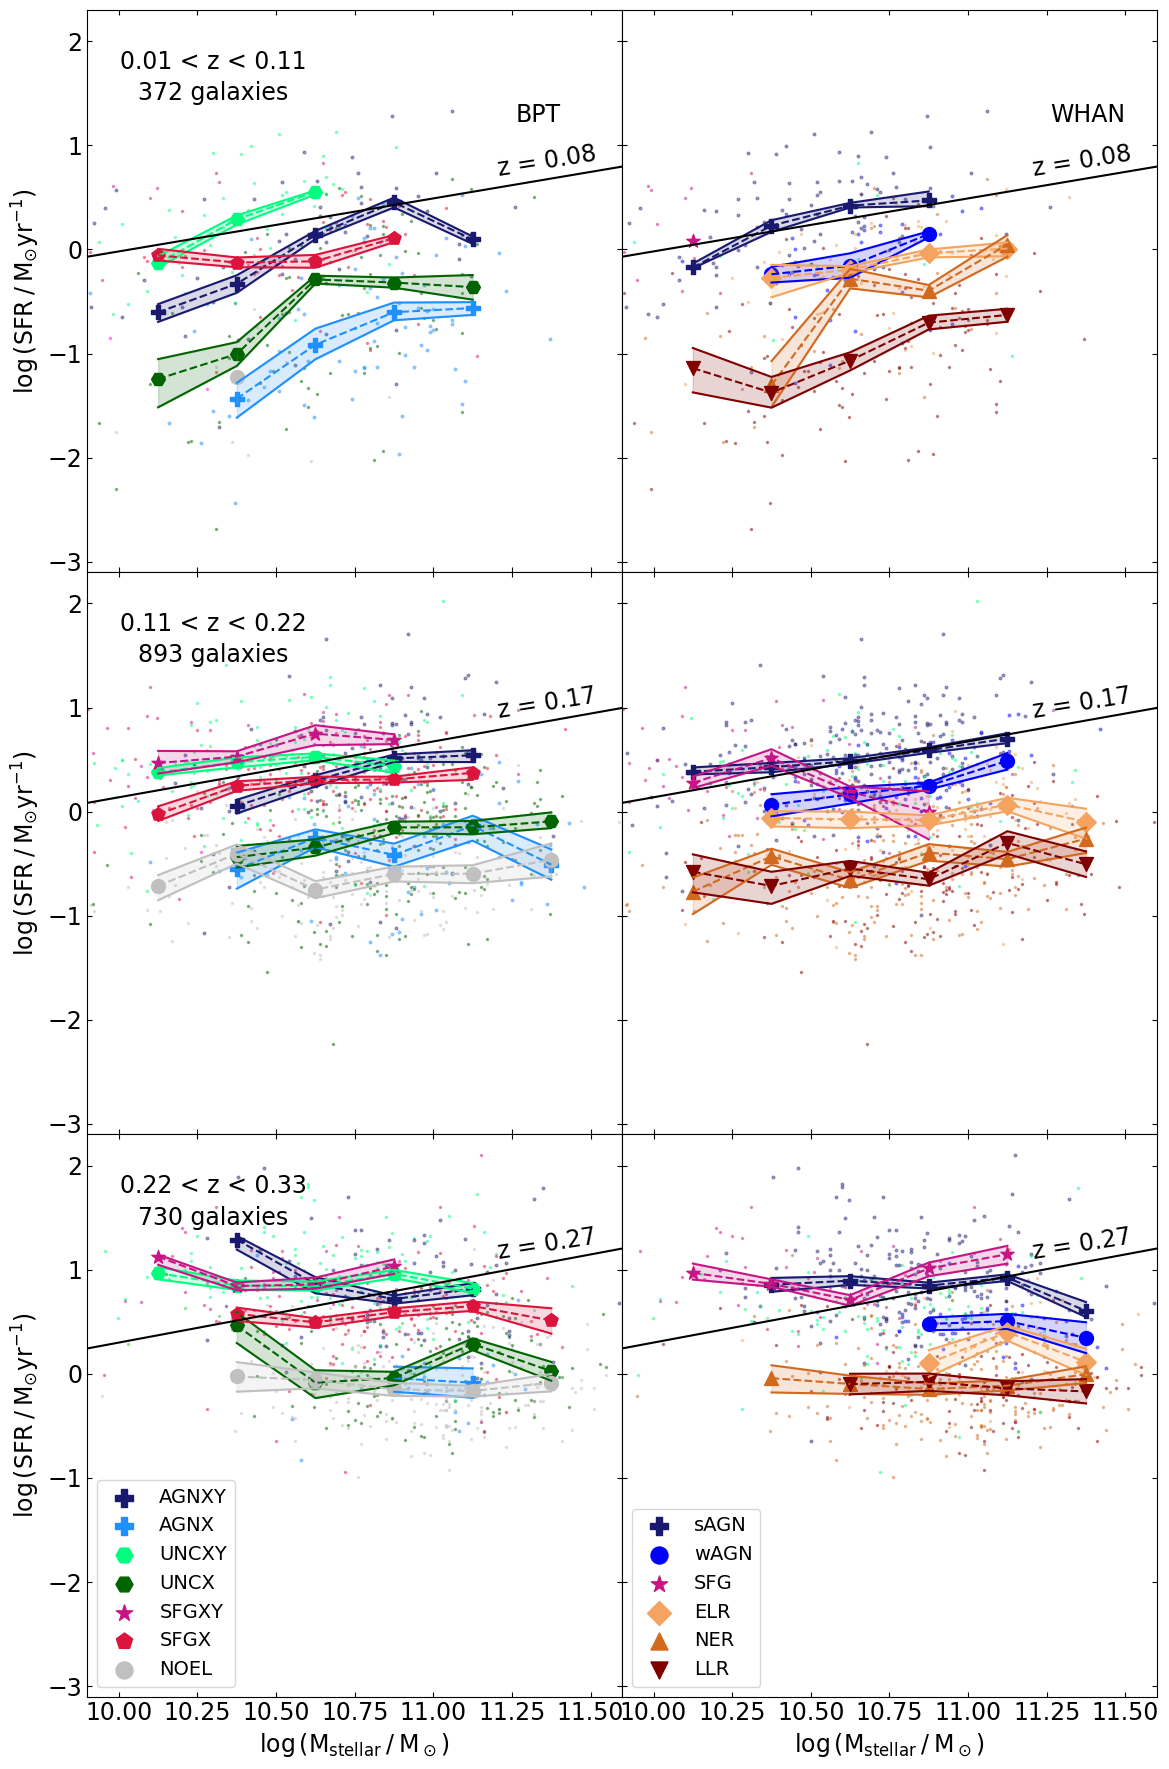

In [6]:
#applying some conditions for db
from astropy.cosmology import WMAP9 as cosmo

db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(3, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 18), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)
ax5 = fig.add_subplot(gs_top[2,0])
ax6 = fig.add_subplot(gs_top[2,1], sharey=ax5)

#creating basic plotting pars

db1 = db[db['Z_1'] <= 0.11]
db1 = db1[db1['Z_1'] > 0.01]
db1.reset_index(inplace=True, drop=True)
median1 = np.median(db1['Z_1'])
print(db1.shape)

pars_dict_1 ={
    'db' : db1,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['Z_1'] <= 0.22]
db2 = db2[db2['Z_1'] > 0.11]
db2.reset_index(inplace=True, drop=True)
median2 = np.median(db2['Z_1'])
print(db2.shape)

pars_dict_2 ={
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : False
}

db3 = db[db['Z_1'] <= 0.33]
db3 = db3[db3['Z_1'] > 0.22]
db3.reset_index(inplace=True, drop=True)
median3 = np.median(db3['Z_1'])
print(db3.shape)

pars_dict_3 ={
    'db' : db3,
    'ax1' : ax5,
    'ax2' : ax6,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.6],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)
ax5, ax6 = plotting(pars_dict_3)

x = np.arange(6.9, 12, 0.1)
ax1.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax1.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)
ax1.text(10.3, 1.8, '0.01 < z < 0.11', ha='center', va='center')
ax1.text(10.3, 1.5, '372 galaxies', ha='center', va='center')
ax2.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax2.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)

ax3.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax3.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)
ax3.text(10.3, 1.8, '0.11 < z < 0.22', ha='center', va='center')
ax3.text(10.3, 1.5, '893 galaxies', ha='center', va='center')
ax4.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax4.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)

ax5.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax5.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)
ax5.text(10.3, 1.8, '0.22 < z < 0.33', ha='center', va='center')
ax5.text(10.3, 1.5, '730 galaxies', ha='center', va='center')
ax6.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax6.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)


#additional plotting stuff
fig.savefig('SFRSM.pdf')
#displaying and saving the figure 

e:\backup\backup_BPT\current\__plt__2.py:315: DtypeWarning: Columns (0,224,227,228,253,267,273,277,288,302,306,323,339,340,358,372,374,413,432,434,450,451,483,504,615,667,699,711,744,752,753,754,755,756,758,804,833,901,933,951,956,1013,1014,1020,1021) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [0, 0, 6, 23, 53, 29, 6] 117
AGNX [0, 0, 3, 9, 27, 79, 25] 143
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [2, 3, 11, 18, 27, 17, 0] 78
UNCX [0, 0, 3, 33, 137, 183, 20] 376
UNCY [1, 0, 0, 0, 3, 0, 0] 4
SFGXY [0, 2, 0, 4, 7, 1, 0] 14
SFGX [0, 3, 10, 46, 103, 32, 6] 200
SFGY [0, 0, 0, 0, 4, 0, 0] 4
NOEL [1, 2, 3, 35, 138, 173, 10] 362
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [4, 10, 36, 168, 499, 514, 67] 1298


AGN [4, 14, 28, 43, 29, 7, 0] 125
AGNX [0, 1, 0, 2, 6, 1, 0] 10
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [11, 34, 64, 91, 36, 5, 0] 241
UNCX [0, 3, 2, 10, 22, 1, 0] 38
UNCY [0, 0, 3, 1, 0, 0, 0] 4
SFGXY [16, 25, 26, 29, 6, 2, 0] 104
SFGX [9, 7, 21, 76, 43, 2, 0] 158
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [1, 1, 1, 7, 6, 1, 0] 17
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [41, 85, 145, 259, 148, 19, 0] 697


AGN [4, 14, 34, 66, 82, 36, 6] 242
AGNX [0, 1, 3, 11, 33, 80, 25] 153
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [13, 37, 75, 109, 63, 22, 0] 319
UNCX [0, 3, 5, 43, 159, 184, 20] 414
UNCY [1, 0, 3, 1, 3, 0, 0] 8
SFGXY [16, 27

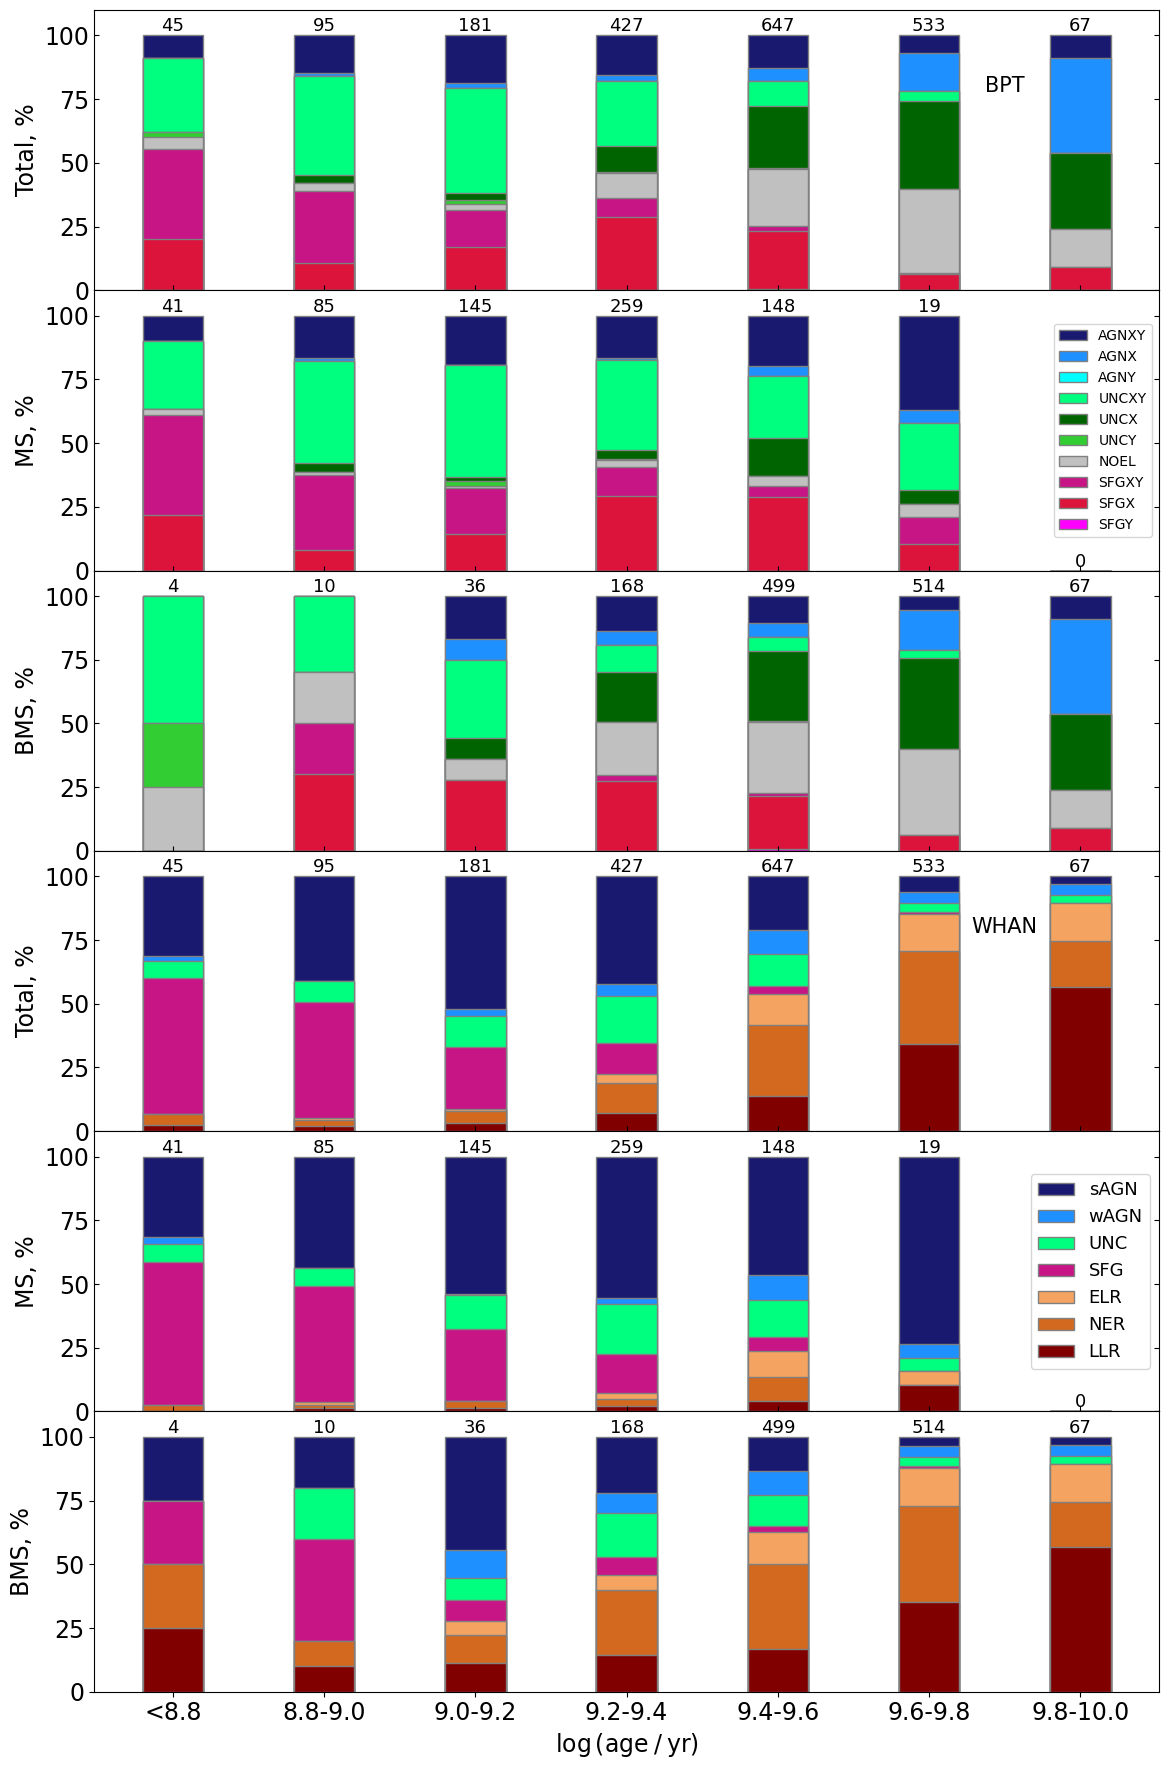

In [7]:
bin_stats({
    'input_path' : path,
    'x' : 'ager_percentile50',
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'bins' : bids_age,
    'bins_names' : ['<8.8', '8.8-9.0', '9.0-9.2', '9.2-9.4', '9.4-9.6', '9.6-9.8', '9.8-10.0'],
    'save_path' : r'AGE_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\current\__plt__2.py:315: DtypeWarning: Columns (0,224,227,228,253,267,273,277,288,302,306,323,339,340,358,372,374,413,432,434,450,451,483,504,615,667,699,711,744,752,753,754,755,756,758,804,833,901,933,951,956,1013,1014,1020,1021) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [3, 5, 14, 33, 35, 23, 3] 116
AGNX [1, 3, 13, 28, 53, 33, 12] 143
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [7, 8, 14, 19, 21, 6, 3] 78
UNCX [7, 6, 25, 74, 133, 97, 29] 371
UNCY [2, 0, 0, 1, 1, 0, 0] 4
SFGXY [3, 2, 1, 4, 2, 2, 0] 14
SFGX [9, 5, 22, 45, 79, 31, 8] 199
SFGY [1, 0, 2, 0, 1, 0, 0] 4
NOEL [9, 11, 33, 75, 88, 105, 36] 357
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [42, 40, 124, 279, 413, 297, 91] 1286


AGN [6, 3, 12, 33, 47, 22, 2] 125
AGNX [0, 0, 2, 2, 5, 1, 0] 10
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [28, 32, 55, 78, 38, 10, 0] 241
UNCX [1, 1, 10, 10, 10, 6, 0] 38
UNCY [0, 2, 1, 1, 0, 0, 0] 4
SFGXY [41, 18, 17, 18, 7, 2, 1] 104
SFGX [19, 10, 26, 45, 40, 18, 0] 158
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [4, 1, 2, 4, 4, 2, 0] 17
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [99, 67, 125, 191, 151, 61, 3] 697


AGN [9, 8, 26, 66, 82, 45, 5] 241
AGNX [1, 3, 15, 30, 58, 34, 12] 153
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [35, 40, 69, 97, 59, 16, 3] 319
UNCX [8, 7, 35, 84, 143, 103, 29] 409
UNCY [2, 2, 1, 2, 1, 0, 0] 8
SFGX

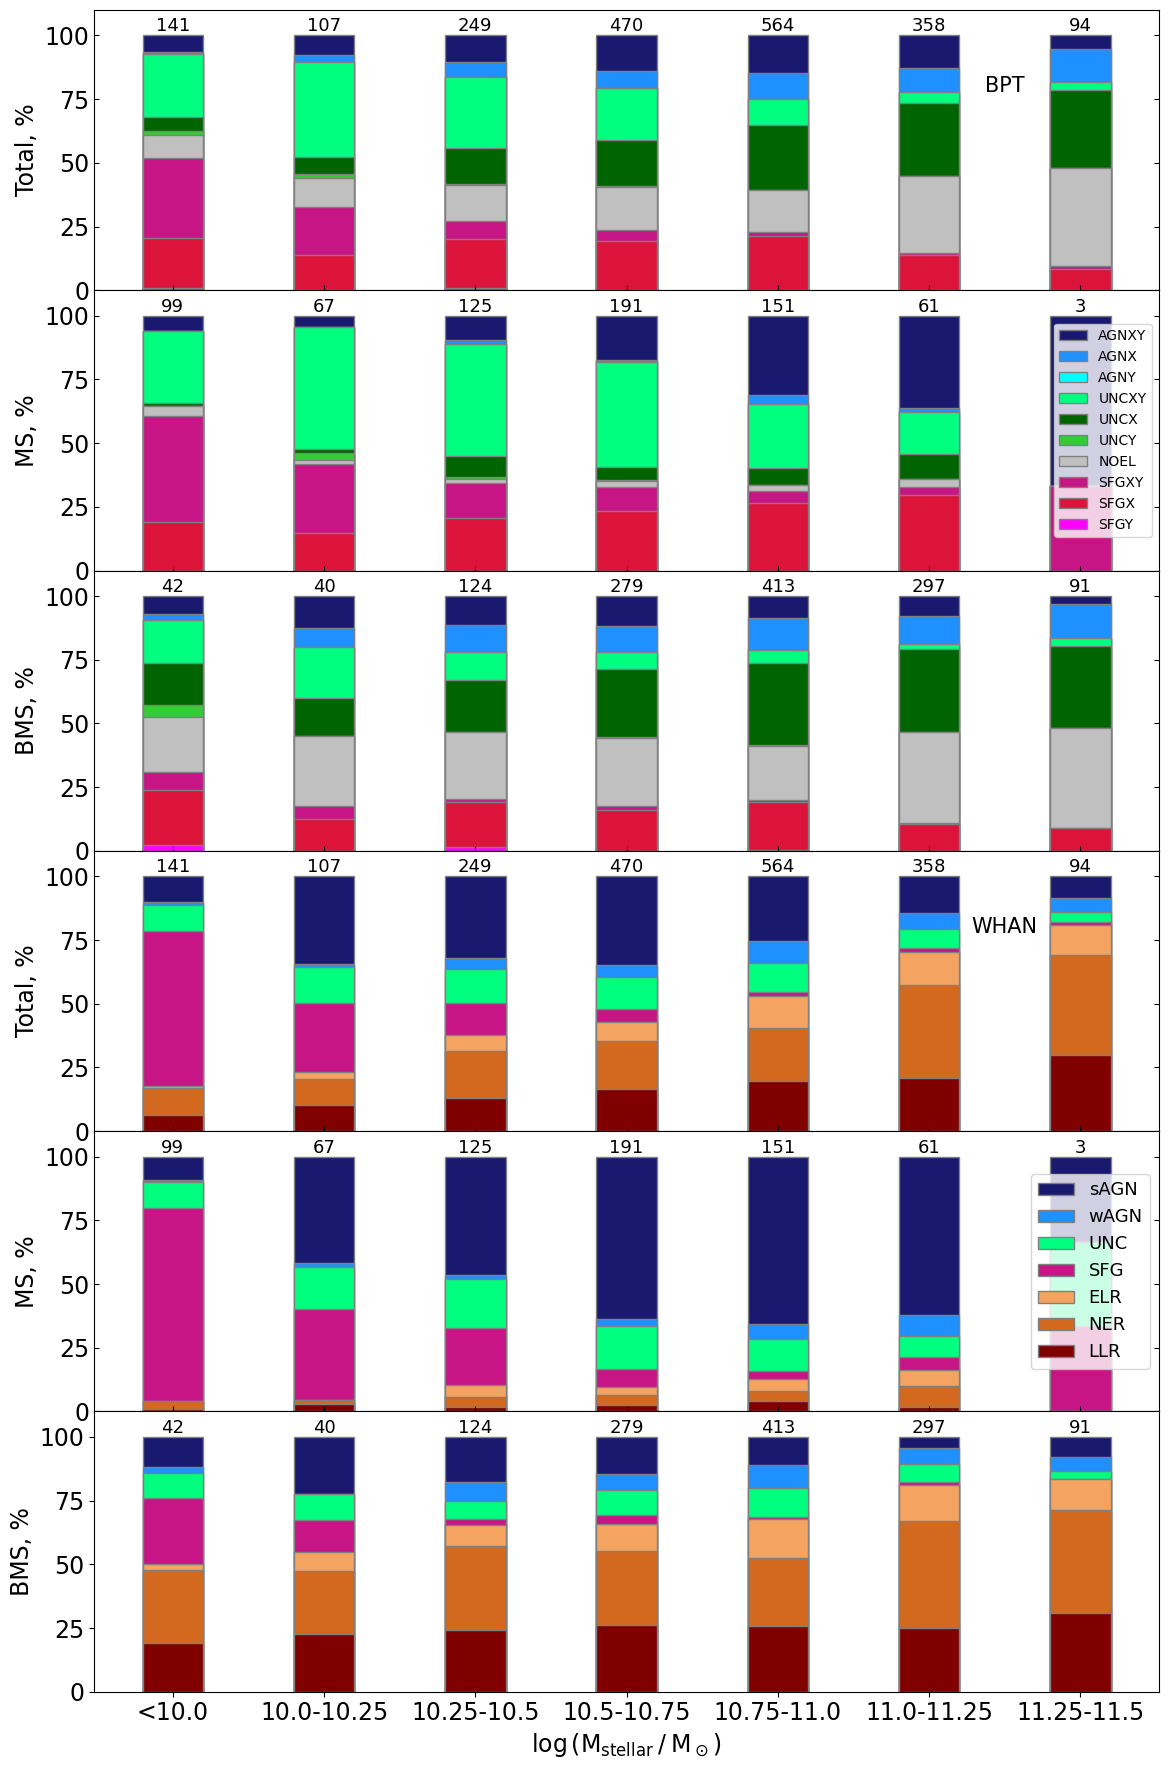

In [8]:
bin_stats({
    'input_path' : path,
    'x' : 'mass_stellar_percentile50',
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'bins' : bids_mass,
    'bins_names' : ['<10.0', '10.0-10.25', '10.25-10.5', '10.5-10.75', '10.75-11.0', '11.0-11.25', '11.25-11.5'],
    'save_path' : r'MASS_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\current\__plt__2.py:315: DtypeWarning: Columns (0,224,227,228,253,267,273,277,288,302,306,323,339,340,358,372,374,413,432,434,450,451,483,504,615,667,699,711,744,752,753,754,755,756,758,804,833,901,933,951,956,1013,1014,1020,1021) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [8, 18, 27, 26, 18, 12, 8] 117
AGNX [16, 37, 36, 28, 10, 10, 6] 143
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [5, 11, 17, 15, 12, 14, 4] 78
UNCX [10, 46, 81, 97, 56, 67, 19] 376
UNCY [0, 0, 1, 1, 1, 1, 0] 4
SFGXY [1, 3, 1, 5, 1, 2, 1] 14
SFGX [10, 16, 40, 47, 36, 42, 9] 200
SFGY [0, 0, 2, 1, 0, 0, 1] 4
NOEL [2, 7, 45, 69, 85, 115, 39] 362
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [52, 138, 250, 289, 219, 263, 87] 1298


AGN [1, 23, 20, 19, 25, 25, 12] 125
AGNX [1, 5, 3, 0, 1, 0, 0] 10
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [7, 28, 51, 41, 41, 54, 19] 241
UNCX [1, 5, 15, 5, 4, 7, 1] 38
UNCY [0, 0, 0, 0, 2, 1, 1] 4
SFGXY [10, 13, 18, 21, 16, 17, 9] 104
SFGX [2, 12, 37, 38, 23, 33, 13] 158
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [0, 1, 5, 2, 1, 7, 1] 17
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [22, 87, 149, 126, 113, 144, 56] 697


AGN [9, 41, 47, 45, 43, 37, 20] 242
AGNX [17, 42, 39, 28, 11, 10, 6] 153
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [12, 39, 68, 56, 53, 68, 23] 319
UNCX [11, 51, 96, 102, 60, 74, 20] 414
UNCY [0, 0, 1, 1,

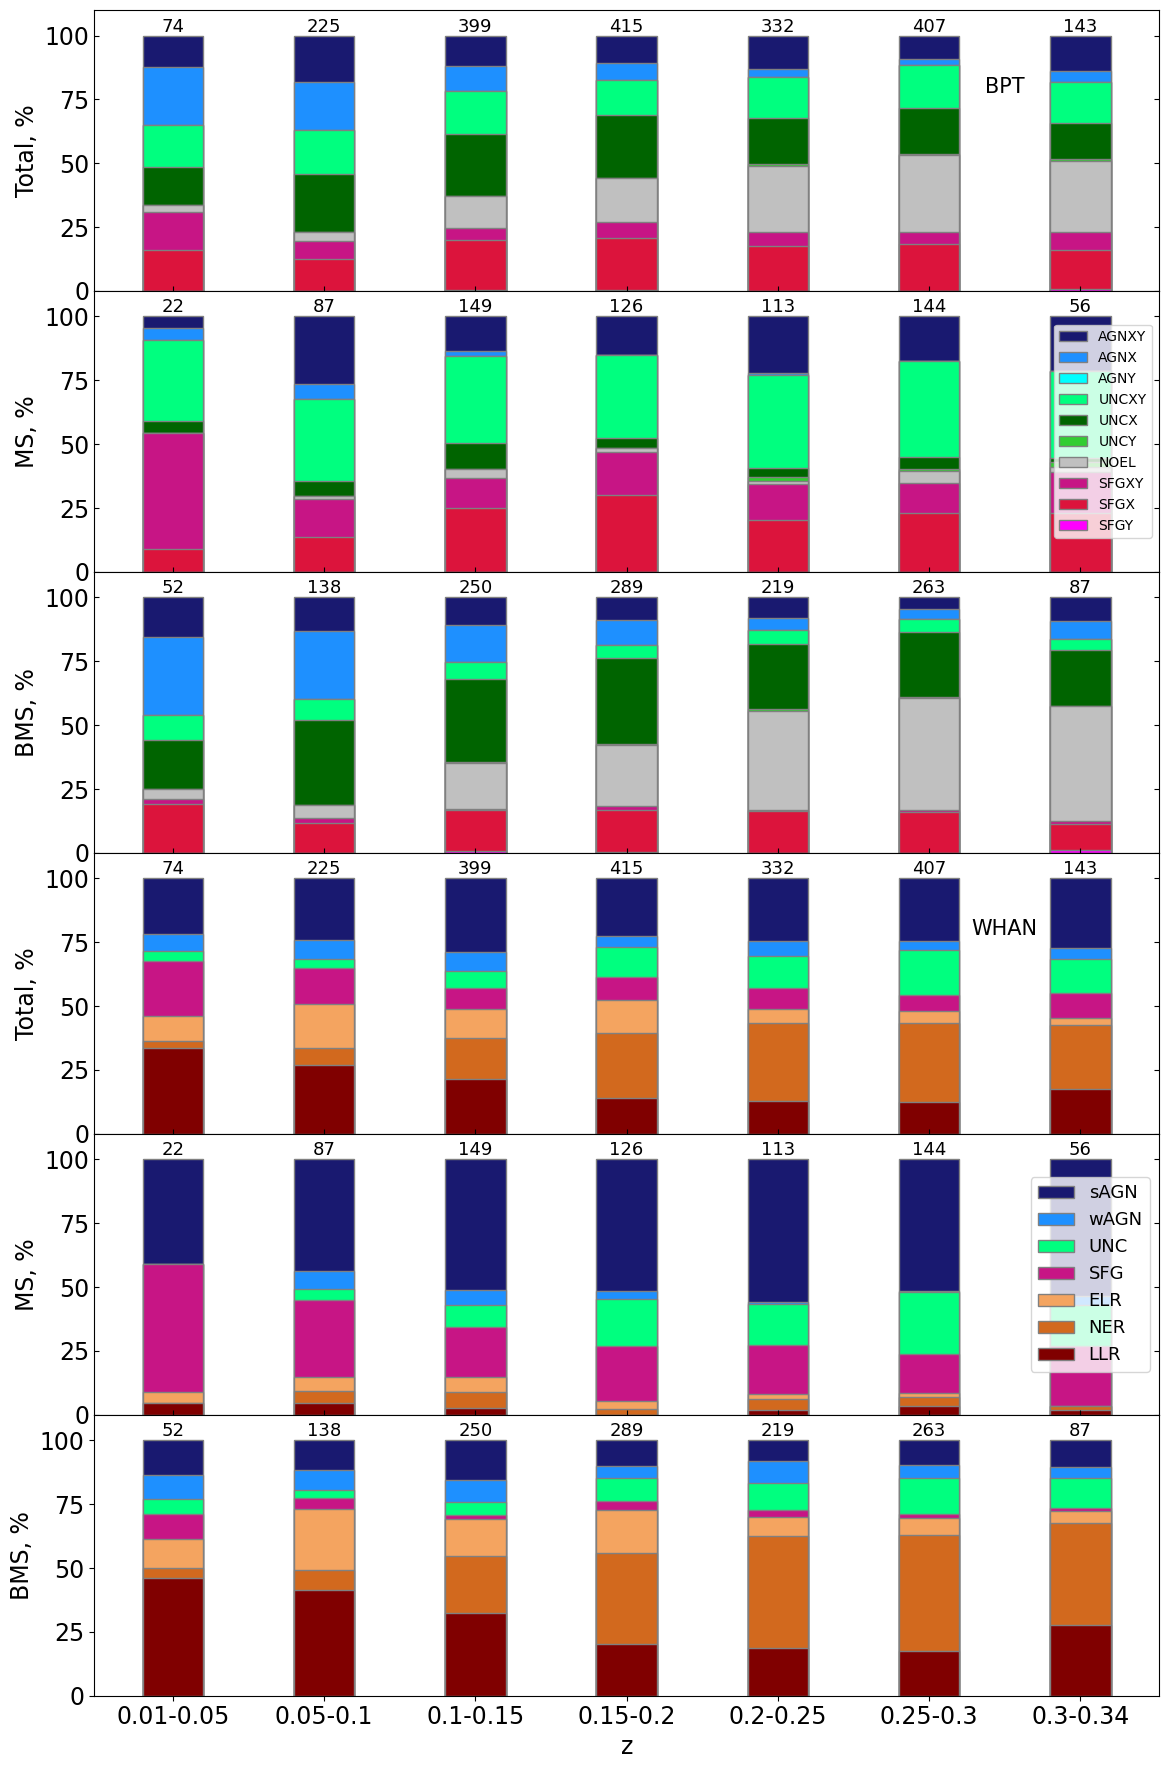

In [9]:
bin_stats({
    'input_path' : path,
    'x' : 'Z_1',
    'xlabel' : r'$\mathrm{z}$',
    'bins' : bids_z,
    'bins_names' : ['0.01-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.34'],
    'save_path' : r'RED_SNAPSHOTS.pdf'
}
)